In [58]:
import matplotlib.pyplot as plt
import random


In [59]:
def collusion_scenario(p, epsilon, time_steps=1000, gas_target=12500000, init_bf=100, txn_fee=101):
    
    block_sizes = [gas_target]
    mempool = 12500000
    revenue_agg = [0]
    revenue = [0]
    mem_overfilled = mempool > 25000000
    base_fee = [init_bf]
    
    for i in range(time_steps - 1):
        colluding = random.random() < p
        if colluding:
            mined_amount = gas_target - epsilon
        else:
            mined_amount = 25000000 if mem_overfilled else mempool
        
        mempool -= mined_amount
        new_basefee = basefee(base_fee[i], mined_amount, gas_target)
        base_fee.append(new_basefee)
        block_sizes.append(mined_amount)
        revenue.append(((txn_fee + i) - new_basefee)+ revenue[i-1]) 
        revenue.append((txn_fee + i) - new_basefee)
        
        mempool += 12500000
    return base_fee, block_sizes, revenue

def basefee(previous, mined_amount, gas_target):
    
    # this if statement is for the special case in which d increases to 9 in case of
    # decreasing basefee. To use this simulation in a regular setting, comment it out. 
#     if(mined_amount < gas_target):
#         return previous*(1+1/9*((mined_amount-gas_target)/gas_target))
    
    return previous*(1+1/8*((mined_amount-gas_target)/gas_target))
    

In [60]:
sim = collusion_scenario(.15, 1000000, 500)
basefee_data = sim[0]
blocksize_data = sim[1]
revenue_data = sim[3]


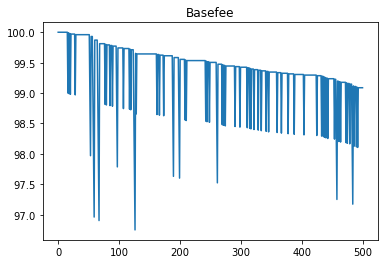

In [61]:
plt.title("Basefee")
plt.plot(basefee_data)

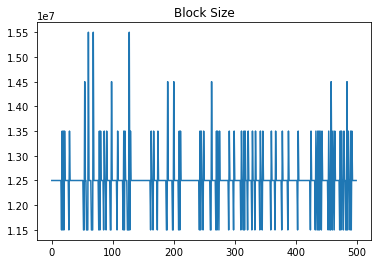

In [62]:
plt.title("Block Size")
plt.plot(blocksize_data)

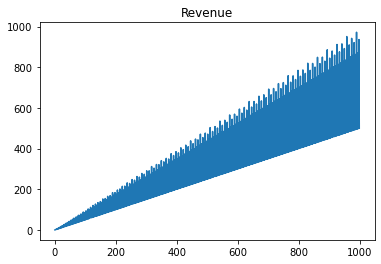

In [63]:
plt.title("Revenue")
no_collusion = collusion_scenario(0, 0, 100)

plt.plot(revenue_data)
# this output is most likely *not* a straight line. 
# at a high number of blocks, the oscillation is hard to see.

In [64]:
print('Total Colluders Revenue: ', sum(revenue_data))
print('Total Control Revenue: ', sum(no_collusion[2]))
print('Total Loss/Gain From Collusion: ', sum(revenue_data)-sum(no_collusion[2]))

Total Colluders Revenue:  332836.0524983595
Total Control Revenue:  0
Total Loss/Gain From Collusion:  332836.0524983595


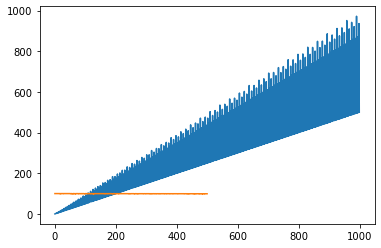

In [65]:
plt.plot(revenue_data)
plt.plot(basefee_data)